# LGBM & XGBM

## Objective:

The objective of this assignment is to compare the performance of Light GBM and XG Boost algorithms using the Titanic dataset.

In [1]:
# %pip install xgboost

In [2]:
# %pip install lightgbm

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from xgboost import XGBClassifier
import lightgbm as lgb

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
df_test = pd.read_csv('Titanic_test.csv')

In [5]:
df_train = pd.read_csv('Titanic_train.csv')

In [6]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
df_test['Survived'] = None

In [9]:
df = pd.concat([df_train,df_test],ignore_index= True)

In [10]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,None,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,None,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,None,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,None,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [11]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,None
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,None
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,None
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,None
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,None


In [15]:
#Exploratory Data Analysis

print(df.describe())
print(df.head())
print(df.info())
print(df.isnull().sum())

       PassengerId       Pclass          Age        SibSp        Parch  \
count  1309.000000  1309.000000  1046.000000  1309.000000  1309.000000   
mean    655.000000     2.294882    29.881138     0.498854     0.385027   
std     378.020061     0.837836    14.413493     1.041658     0.865560   
min       1.000000     1.000000     0.170000     0.000000     0.000000   
25%     328.000000     2.000000    21.000000     0.000000     0.000000   
50%     655.000000     3.000000    28.000000     0.000000     0.000000   
75%     982.000000     3.000000    39.000000     1.000000     0.000000   
max    1309.000000     3.000000    80.000000     8.000000     9.000000   

              Fare  
count  1308.000000  
mean     33.295479  
std      51.758668  
min       0.000000  
25%       7.895800  
50%      14.454200  
75%      31.275000  
max     512.329200  
   PassengerId Survived  Pclass  \
0            1        0       3   
1            2        1       1   
2            3        1       3   
3   

In [17]:
#drop rows with missing values
df = df.dropna()

In [19]:
#Encode categorical variables
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

In [22]:
#prepare Data for modeling 
features = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
X = df[features]
y= df['Survived']

In [23]:
#Ensure target type is in integer
y = y.astype(int)

In [25]:
#Split Data 
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [26]:
#Train Models 
lgb_model = lgb.LGBMClassifier(random_state=42)
xgb_model = XGBClassifier(random_state= 42)

In [27]:
#fit Models 
lgb_model.fit(X_train,y_train)
xgb_model.fit(X_train,y_train)

[LightGBM] [Info] Number of positive: 100, number of negative: 46
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000129 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 92
[LightGBM] [Info] Number of data points in the train set: 146, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.684932 -> initscore=0.776529
[LightGBM] [Info] Start training from score 0.776529
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Lig

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [28]:

# Predictions and metrics for LightGBM
lgb_preds = lgb_model.predict(X_test)
lgb_metrics = {
    'Accuracy': accuracy_score(y_test, lgb_preds),
    'Precision': precision_score(y_test, lgb_preds),
    'Recall': recall_score(y_test, lgb_preds),
    'F1-Score': f1_score(y_test, lgb_preds)
}

In [29]:
# Predictions and metrics for XGBoost
xgb_preds = xgb_model.predict(X_test)
xgb_metrics = {
    'Accuracy': accuracy_score(y_test, xgb_preds),
    'Precision': precision_score(y_test, xgb_preds),
    'Recall': recall_score(y_test, xgb_preds),
    'F1-Score': f1_score(y_test, xgb_preds)
}

In [30]:

# Hyperparameter tuning for LightGBM
param_grid_lgb = {
    'num_leaves': [31, 63, 127],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 500]
}
grid_search_lgb = GridSearchCV(lgb.LGBMClassifier(), param_grid_lgb, cv=5, scoring='accuracy')
grid_search_lgb.fit(X_train, y_train)


[LightGBM] [Info] Number of positive: 80, number of negative: 36
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000053 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 73
[LightGBM] [Info] Number of data points in the train set: 116, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.689655 -> initscore=0.798508
[LightGBM] [Info] Start training from score 0.798508
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

GridSearchCV(cv=5, estimator=LGBMClassifier(),
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'n_estimators': [100, 200, 500],
                         'num_leaves': [31, 63, 127]},
             scoring='accuracy')

In [31]:
# Hyperparameter tuning for XGBoost
param_grid_xgb = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 500]
}
grid_search_xgb = GridSearchCV(XGBClassifier(), param_grid_xgb, cv=5, scoring='accuracy')
grid_search_xgb.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 500]},
             scoring='accuracy')

In [32]:
# Print best parameters and scores
print(f"Best parameters for LightGBM: {grid_search_lgb.best_params_}")
print(f"Best accuracy for LightGBM: {grid_search_lgb.best_score_}")

print(f"Best parameters for XGBoost: {grid_search_xgb.best_params_}")
print(f"Best accuracy for XGBoost: {grid_search_xgb.best_score_}")


Best parameters for LightGBM: {'learning_rate': 0.01, 'n_estimators': 200, 'num_leaves': 31}
Best accuracy for LightGBM: 0.760919540229885
Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Best accuracy for XGBoost: 0.7604597701149425


In [33]:
# Comparative Analysis
metrics_df = pd.DataFrame({
    'Model': ['LightGBM', 'XGBoost'],
    'Accuracy': [lgb_metrics['Accuracy'], xgb_metrics['Accuracy']],
    'Precision': [lgb_metrics['Precision'], xgb_metrics['Precision']],
    'Recall': [lgb_metrics['Recall'], xgb_metrics['Recall']],
    'F1-Score': [lgb_metrics['F1-Score'], xgb_metrics['F1-Score']]
})
print(metrics_df)


      Model  Accuracy  Precision    Recall  F1-Score
0  LightGBM  0.702703   0.750000  0.782609  0.765957
1   XGBoost  0.621622   0.666667  0.782609  0.720000


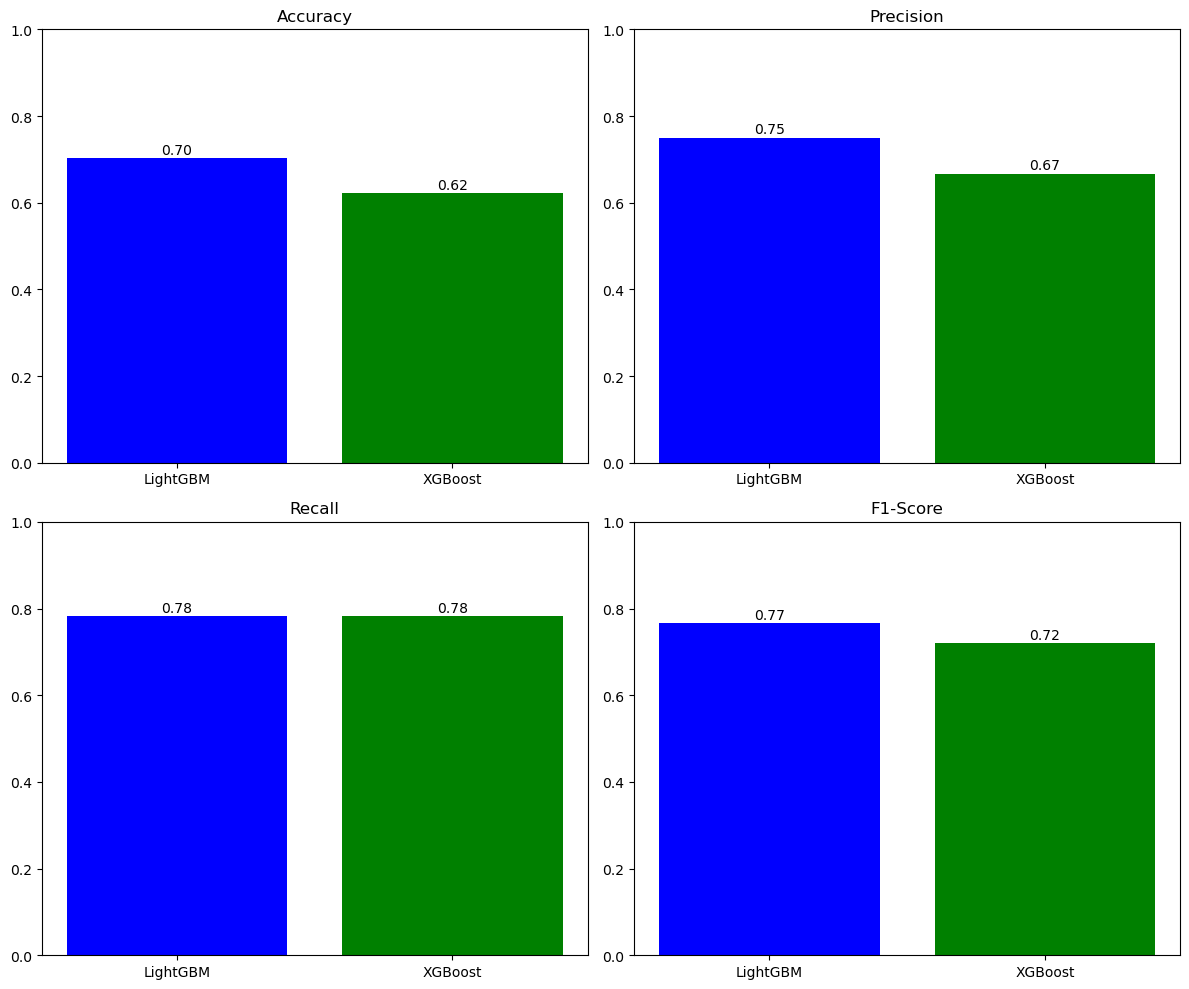

In [34]:
# Visualization
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
metrics_values = [[lgb_metrics['Accuracy'], xgb_metrics['Accuracy']],
                  [lgb_metrics['Precision'], xgb_metrics['Precision']],
                  [lgb_metrics['Recall'], xgb_metrics['Recall']],
                  [lgb_metrics['F1-Score'], xgb_metrics['F1-Score']]]

for i, subplot in enumerate(ax.flatten()):
    subplot.bar(['LightGBM', 'XGBoost'], metrics_values[i], color=['blue', 'green'])
    subplot.set_title(metrics_names[i])
    subplot.set_ylim(0, 1)
    for index, value in enumerate(metrics_values[i]):
        subplot.text(index, value + 0.01, f"{value:.2f}", ha='center')

plt.tight_layout()
plt.show()
     
